# Crop Classification

Dataset: `crop_classification_dataset.csv`

This notebook includes EDA, data cleaning, preprocessing, and modeling for a **Classification** problem.

## 1. Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


## 2. Load & Preview Data

In [32]:
# Load dataset
df = pd.read_csv('crop_classification_dataset.csv')
# prrind data shape
print("Data shape:", df.shape)
#print haid at tail
print(df.head())
print(df.tail())

Data shape: (1000, 11)
   latitude  longitude  rainfall_mm  temperature_c   soil_ph  \
0 -1.938190  29.277699   141.596989      28.454060       NaN   
1 -1.073929  29.812851          NaN            NaN       NaN   
2 -1.402009  30.309419   367.189103      20.009358  7.040644   
3 -1.602012  30.098337   137.341170      27.497482  4.615600   
4 -2.265972        NaN   145.182404            NaN  4.596998   

   nitrogen_content  phosphorus_content  potassium_content  organic_matter  \
0          2.271360                 NaN           0.251318        7.342545   
1          2.630460                 NaN           0.828413        7.029189   
2          4.345463            3.502339           3.341859        1.409665   
3               NaN                 NaN           3.090397        9.264438   
4          4.413424            0.713095           1.467506        5.900486   

   elevation_m crop_type  
0  2370.367017    Coffee  
1  1788.040723     Wheat  
2          NaN    Coffee  
3          NaN 

## 3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            904 non-null    float64
 1   longitude           903 non-null    float64
 2   rainfall_mm         905 non-null    float64
 3   temperature_c       898 non-null    float64
 4   soil_ph             895 non-null    float64
 5   nitrogen_content    882 non-null    float64
 6   phosphorus_content  893 non-null    float64
 7   potassium_content   910 non-null    float64
 8   organic_matter      913 non-null    float64
 9   elevation_m         898 non-null    float64
 10  crop_type           1000 non-null   object 
dtypes: float64(10), object(1)
memory usage: 86.1+ KB
None
         latitude   longitude  rainfall_mm  temperature_c     soil_ph  \
count  904.000000  903.000000   905.000000     898.000000  895.000000   
mean    -1.762612   29.760033   225.837236      24.8

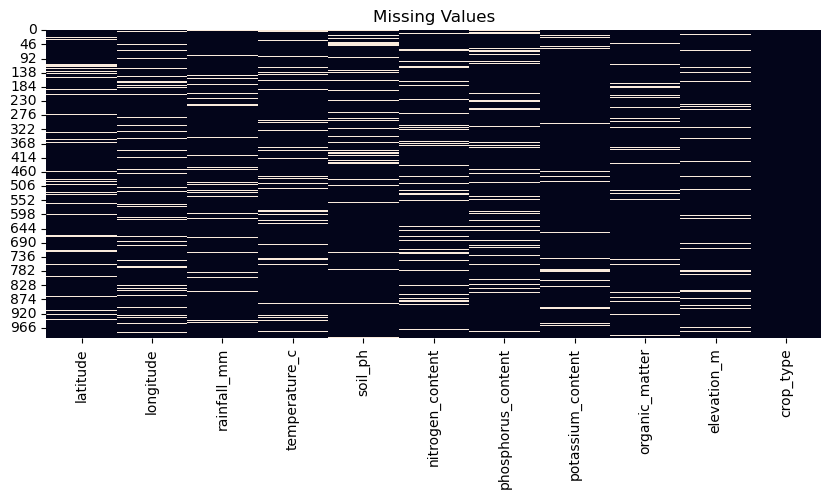

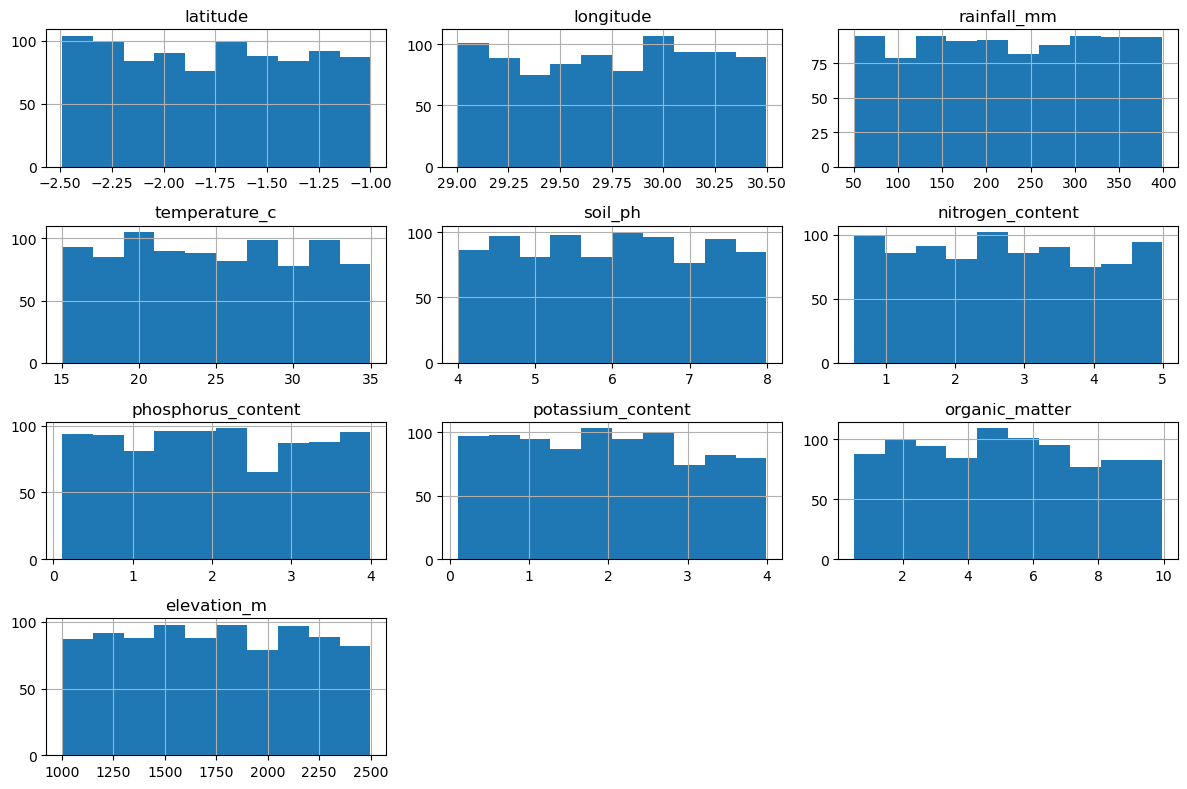

In [33]:
# Exploratory Data Analysis
print(df.info())
print(df.describe())
# Missing data visualization
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()
# Basic distributions
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## 4. Data Cleaning & Preprocessing

In [36]:
# Define preprocessing pipeline
X = df.drop('crop_type', axis=1)
y = df['crop_type']

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features)
    ])

## 5. Modeling & Evaluation

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Modeling
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Beans       0.80      0.80      0.80        50
      Coffee       1.00      0.86      0.92        64
       Maize       0.87      0.81      0.84        16
       Wheat       0.84      0.96      0.89        70

    accuracy                           0.88       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200



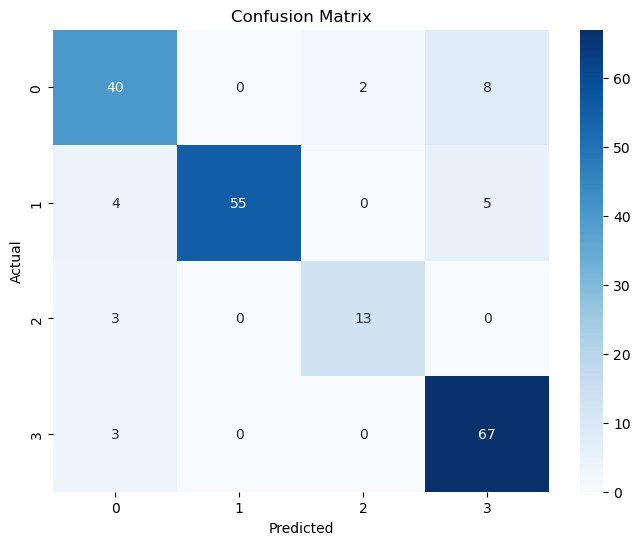

In [38]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()